# Hierarchical agglomerative clustering (Above-phoneme)

### Collect training features

In [ ]:
import numpy as np
import random
import os, sys
import matplotlib.pyplot as plt
import warnings
from lib.esn import ESN
from dataset.loading import Feature_Collector

random.seed(0)
np.random.seed(0)
warnings.filterwarnings("ignore")

directory = os.path.abspath('/Users/joris/Documents/Work/bsc ai/bt/Bachelor-Thesis/code')
sys.path.append(directory)

path = '../../data/'
fc = Feature_Collector(path)

dr = []
speakers = []
XorZ = "X"
long_version = False
n_mels = 13
delta = False
delta_delta = False
subsamples = 10

path_option = "Final"+str(long_version)+str(n_mels)+str(delta)+str(delta_delta)+str(subsamples)

if dr:
    path_option = str(dr)+"_"+path_option
if len(speakers):
    path_option = str(speakers[0])+"_"+path_option

features, labels, _ = fc.collectFeaturesInSegments(
    n_mels=n_mels, delta=delta, delta_delta=delta_delta,
    long_version=long_version, speakers=speakers, dr=dr,
    subsamples=subsamples, path_option=path_option)

In [ ]:
from dataset.data_helpers import *

selected_labels = ["aa", "b", "s", "iy", "uh"]
#selected_labels = ["aa", "ae", "ah", "eh", "ih", "iy", "uh"]
#selected_labels = ["aa", "ae", "ah", "eh", "ih", "iy", "uh", "er", "ey", "ix", "aw", "axr", "l", "oy", "r", "y"]

group = group_by_labels(features, labels, selected_labels=selected_labels)
phonemes = list(group.keys())

In [3]:
# init reservoir
esn_params = {
    "in_dim": n_mels*(1+delta+delta_delta),
    "out_dim": n_mels*(1+delta+delta_delta),
    "N": 10,
    "W_in_scale": 1.5,
    "b_scale": .2,
    "spectral_radius": 1.5
}

esn = ESN(esn_params)

In [4]:
from lib.experiment_helpers import *

aperture = "auto"
normalize = True
Cs = compute_Cs(group, esn, aperture=aperture, normalize=normalize, XorZ=XorZ)

h#  -  39467  samples
w  -  3140  samples
ih  -  13693  samples
s  -  7475  samples
ah  -  6291  samples
ch  -  822  samples
n  -  8762  samples
ae  -  3997  samples
t  -  4364  samples
v  -  1994  samples
r  -  6539  samples
f  -  2216  samples
y  -  1715  samples
uw  -  2463  samples
sh  -  2389  samples
l  -  6752  samples
b  -  2181  samples
iy  -  6953  samples
aa  -  6004  samples
d  -  3548  samples
eh  -  3853  samples
p  -  2588  samples
z  -  3773  samples
ey  -  2282  samples
dx  -  2709  samples
ay  -  2390  samples
ng  -  1368  samples
k  -  4874  samples
dh  -  2826  samples
er  -  5453  samples
m  -  4027  samples
jh  -  1209  samples
g  -  2017  samples
ow  -  2136  samples
aw  -  729  samples
hh  -  2111  samples
uh  -  535  samples
oy  -  684  samples
th  -  751  samples


In [6]:
from lib.clustering_helpers import *

save = True

hm_filename = str(selected_labels)+path_option+XorZ + str(aperture) + str(esn.esn_params) + str(group.keys()) + str(len(list(group.values())[0])) + "heatmap"

hm = try_reading_from_cache(hm_filename)
if hm == False:
    print("- computing heatmap")
    hm = dist_matrix(Cs)
    save_to_cache(hm_filename, hm)
    print("--- Done")

- computing heatmap
--- Done


### Average linkage and plotting of its results

In [ ]:
import scipy.cluster.hierarchy as sc
import scipy.spatial.distance as ssd

distArray = ssd.squareform(hm)

link = sc.linkage(1-distArray/np.max(distArray), method='average', optimal_ordering=False)

# Plot dendrogram
fig, ax = plt.subplots(figsize=(12, 9))

sc.dendrogram(link,labels=phonemes,orientation='right',distance_sort=False)

plt.title("Average Linkage on Phoneme Conceptors using Herbert's Distance Metric",fontsize=15)
plt.ylabel('Phoneme',fontsize=15)
plt.xlabel(r"Distance d$(p^1, p^2)=1-\frac{sim(C^1,C^2)}{max_{i,j}sim(C^i,C^j)}$",fontsize=15)
plt.show()

### Plot Heatmap

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

labs = ax.xaxis.get_label()
print(len(labs),len(phonemes))
reorder = [ phonemes.index(lab) for lab in labs]
hm = hm[reorder,:]
hm = hm[:,reorder]

plt.figure(figsize=(17,15),dpi=200)
sns.set_theme()
sns.set(font_scale=2)

ax = sns.heatmap(hm, xticklabels=labs, yticklabels=labs, linewidths=.5, center=np.mean(hm)-.06)

plt.rc('xtick', labelsize='20')    # fontsize of the tick labels
plt.rc('ytick', labelsize='20')

recs = [
    [1,1]
    
]

for rec in recs:
    ax.add_patch(
         patches.Rectangle(
             (rec[0], rec[0]),
             rec[1],
             rec[1],
             edgecolor='blue',
             fill=False,
             lw=5
         ) )

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

['h#', 'w', 'ih', 's', 'ah', 'ch', 'n', 'ae', 't', 'v', 'r', 'f', 'y', 'uw', 'sh', 'l', 'b', 'iy', 'aa', 'd', 'eh', 'p', 'z', 'ey', 'dx', 'ay', 'ng', 'k', 'dh', 'er', 'm', 'jh', 'g', 'ow', 'aw', 'hh', 'uh', 'oy', 'th']
34 39


IndexError: index 35 is out of bounds for axis 0 with size 34

<Figure size 3400x3000 with 0 Axes>

# Old -  May be deletable

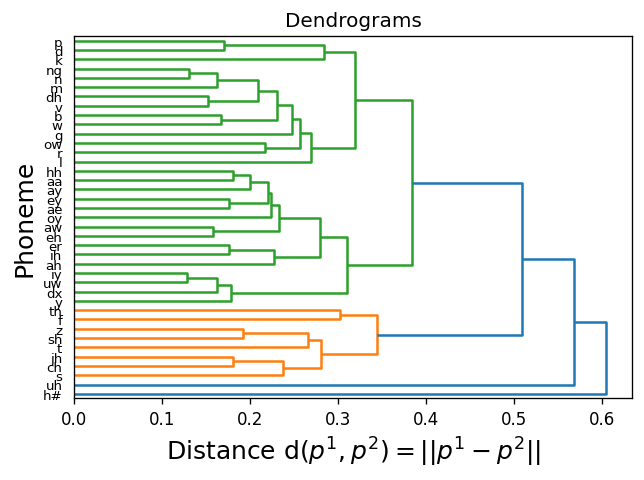

In [8]:
import scipy.cluster.hierarchy as sc
import scipy.spatial.distance as ssd

for i in range(heat_map.shape[0]):
    heat_map[i,i] = 0
distArray = ssd.squareform(heat_map)

if dist_fun == 'cos':
    distances = 1-distArray/np.max(distArray)
else:
    distances = distArray/np.max(distArray)

link = sc.linkage(distances, method='average', optimal_ordering=False)

# Plot dendrogram
plt.figure(dpi=120)
plt.title("Dendrograms")  
# Create dendrogram
sc.dendrogram(link,labels=phonemes,orientation='right',distance_sort=False)

#plt.title("Average Linkage on Phoneme Conceptors using Herbert's Distance Metric",fontsize=15)
plt.ylabel('Phoneme',fontsize=15)
plt.xlabel(r"Distance d$(p^1, p^2)=||p^1-p^2||$",fontsize=15)
plt.show()

In [ ]:
heat_map = np.zeros((len(phonemes),len(phonemes)))

for i, samples in enumerate(group.values()):
    print("It: ",i)
    if XorZ == "X":
        X = np.array([])
        for sample in samples:
            x,_ = esn.run_X(sample.T,0,sample.shape[0])
            X = np.hstack((X, x)) if X.size else x
        es = evidences_for_Cs(x,Cs_above,Ns_above)
    es = [ np.sum(p) for p in es ]
    es = np.array(es)
    heat_map[i,:] = np.array(es.T)
    heat_map[:,i] = np.array(es)

print(heat_map)

In [ ]:
for i in range(heat_map.shape[0]):
    heat_map[i,i] = 0
distArray = ssd.squareform(heat_map)

link = sc.linkage(1-distArray/np.max(distArray), method='average', optimal_ordering=False)

# Plot dendrogram
plt.figure(figsize=(10, 7))

sc.dendrogram(link,labels=phonemes,orientation='right',distance_sort=False)

plt.title("Average Linkage on Phoneme Conceptors using Herbert's Distance Metric",fontsize=15)
plt.ylabel('Phoneme',fontsize=15)
plt.xlabel(r"Distance d$(p^1, p^2)=1-\frac{sim(C^1,C^2)}{max_{i,j}sim(C^i,C^j)}$",fontsize=15)
plt.show()